In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.metrics import f1_score, classification_report
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold

In [47]:
data = pd.read_csv("train.csv",index_col=0)

In [50]:
data

,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
pose_id,,,,,,,,,,,,,,,,,,,,,
0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,-51.986694,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,-0.378148,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,88.543910,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,-30.007776,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,-18.204160,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,situp_up,-25.679585,-47.380875,-5.901453,-25.139788,-51.002510,-10.440426,-24.879524,-51.218052,-10.440801,...,14.827999,-55.717426,-0.799386,48.414420,-59.586680,-16.158272,1.463939,-56.319120,-17.240007,40.646820
1093,jumping_jacks_up,-1.185803,-51.386070,-31.526268,-0.436185,-53.642360,-28.797546,0.175695,-53.750496,-28.796741,...,8.130944,-12.678401,47.509556,62.822067,17.710821,51.948390,-14.776978,-17.019627,49.782352,47.884693
1094,pullups_down,-4.307419,-49.337822,7.097422,-4.982467,-51.214745,9.683287,-5.098945,-51.260090,9.667620,...,-22.450487,35.971850,14.499550,-48.723770,36.879860,-5.513745,-34.270077,39.437458,0.077004,-62.674248


In [13]:
X = data.drop(columns = ["pose"])
y = data["pose"]

In [14]:
X

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
pose_id,,,,,,,,,,,,,,,,,,,,,
0,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,-51.986694,0.858925,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,-0.378148,56.832386,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,88.543910,15.034156,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,-30.007776,2.137811,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,-18.204160,-0.933045,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,-25.679585,-47.380875,-5.901453,-25.139788,-51.002510,-10.440426,-24.879524,-51.218052,-10.440801,-24.600859,...,14.827999,-55.717426,-0.799386,48.414420,-59.586680,-16.158272,1.463939,-56.319120,-17.240007,40.646820
1093,-1.185803,-51.386070,-31.526268,-0.436185,-53.642360,-28.797546,0.175695,-53.750496,-28.796741,0.790328,...,8.130944,-12.678401,47.509556,62.822067,17.710821,51.948390,-14.776978,-17.019627,49.782352,47.884693
1094,-4.307419,-49.337822,7.097422,-4.982467,-51.214745,9.683287,-5.098945,-51.260090,9.667620,-5.205800,...,-22.450487,35.971850,14.499550,-48.723770,36.879860,-5.513745,-34.270077,39.437458,0.077004,-62.674248


In [15]:
y

pose_id
0                squats_up
1               situp_down
2               situp_down
3         jumping_jacks_up
4       jumping_jacks_down
               ...        
1092              situp_up
1093      jumping_jacks_up
1094          pullups_down
1095            situp_down
1096      jumping_jacks_up
Name: pose, Length: 1097, dtype: object

In [16]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# Veriyi birebir sayısallaştırmaya yarar. Yani kategorik her veriye sayısal bir değer atar.

In [76]:
for i in range(20):
    print(y[i])

9
6
6
1
0
2
6
6
1
4
9
5
1
8
0
4
3
3
1
9


In [63]:
len(y)

1097

In [62]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , test_size=0.2)

In [20]:
fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [21]:
def objective(trial):

    depth = trial.suggest_int("max_depth", 4, 8)
    param = {
        "objective": "multiclassova",
        "metric": "multi_logloss",
        "boosting_type": "gbdt",
        "max_bin": trial.suggest_int("max_bin", 100, 255),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 40),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-4, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-4, 10.0, log=True),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split",0,0.2),
        "max_depth": depth,
        "num_leaves": 2**depth - 1,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        #"min_sum_hessian_in_leaf": trial.suggest_float("min_sum_hessian_in_leaf", 1e-3, 2),
        'verbosity': -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "random_state":42,
        "num_classes":10,
        "is_unbalance":True
        }
    
    cv_score = np.array([])
    for train_index, test_index in fold.split(X_train, y_train):
        x_train_fold, x_test_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
        dtrain = lgb.Dataset(x_train_fold, label=y_train_fold)
        reg = lgb.train(param, dtrain)
    
        predictions = reg.predict(x_test_fold)
        y_pred = [np.argmax(line) for line in predictions]
        score = f1_score(y_test_fold,y_pred,average = "weighted")
        cv_score = np.append(cv_score,score)
        
    return np.mean(cv_score)


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-03 16:57:58,913] A new study created in memory with name: no-name-24530703-e840-4f01-85bc-60119f67925b
[I 2023-01-03 16:58:00,620] Trial 0 finished with value: 0.8350442014941694 and parameters: {'max_depth': 7, 'max_bin': 135, 'min_data_in_leaf': 28, 'lambda_l1': 0.03399393532358672, 'lambda_l2': 0.001439967735782494, 'min_gain_to_split': 0.179094871473104, 'feature_fraction': 0.7475854985188661, 'bagging_fraction': 0.41467768352076817, 'bagging_freq': 1, 'learning_rate': 0.17724986116673253}. Best is trial 0 with value: 0.8350442014941694.
[I 2023-01-03 16:58:03,502] Trial 1 finished with value: 0.8385129275735004 and parameters: {'max_depth': 8, 'max_bin': 148, 'min_data_in_leaf': 34, 'lambda_l1': 0.0070775273517342105, 'lambda_l2': 0.00029859072814641995, 'min_gain_to_split': 5.556906758827918e-05, 'feature_fraction': 0.5404061233165617, 'bagging_fraction': 0.9450202135024484, 'bagging_freq': 1, 'learning_rate': 0.05719445651704821}. Best is trial 1 with value: 0.8385129

[I 2023-01-03 16:58:40,112] Trial 18 finished with value: 0.8534870802062737 and parameters: {'max_depth': 5, 'max_bin': 204, 'min_data_in_leaf': 36, 'lambda_l1': 0.0004861017635280801, 'lambda_l2': 0.0021057176991849027, 'min_gain_to_split': 0.19721331339529635, 'feature_fraction': 0.787068824140276, 'bagging_fraction': 0.5801766016350407, 'bagging_freq': 5, 'learning_rate': 0.17224772031954258}. Best is trial 18 with value: 0.8534870802062737.
[I 2023-01-03 16:58:43,182] Trial 19 finished with value: 0.8473348493664551 and parameters: {'max_depth': 7, 'max_bin': 219, 'min_data_in_leaf': 37, 'lambda_l1': 0.0005978777681620395, 'lambda_l2': 0.001558210297657352, 'min_gain_to_split': 0.15987771566014217, 'feature_fraction': 0.62628999113855, 'bagging_fraction': 0.7812484008486988, 'bagging_freq': 5, 'learning_rate': 0.09580891450466598}. Best is trial 18 with value: 0.8534870802062737.
[I 2023-01-03 16:58:45,598] Trial 20 finished with value: 0.835464460049883 and parameters: {'max_dept

[I 2023-01-03 16:59:22,304] Trial 36 finished with value: 0.8489628805959499 and parameters: {'max_depth': 4, 'max_bin': 202, 'min_data_in_leaf': 27, 'lambda_l1': 0.013513431030932778, 'lambda_l2': 0.001166247740130208, 'min_gain_to_split': 0.12110999267140138, 'feature_fraction': 0.6911359684209685, 'bagging_fraction': 0.7460252308583467, 'bagging_freq': 4, 'learning_rate': 0.19127974172274953}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 16:59:24,418] Trial 37 finished with value: 0.8547430474537017 and parameters: {'max_depth': 4, 'max_bin': 213, 'min_data_in_leaf': 25, 'lambda_l1': 0.004450230195075227, 'lambda_l2': 0.0002603191426814827, 'min_gain_to_split': 0.1012848099230474, 'feature_fraction': 0.7461932076994018, 'bagging_fraction': 0.6865012253346665, 'bagging_freq': 5, 'learning_rate': 0.1725128882552266}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 16:59:26,651] Trial 38 finished with value: 0.8436999849826587 and parameters: {'max_dept

[I 2023-01-03 17:00:02,582] Trial 54 finished with value: 0.8488527827509371 and parameters: {'max_depth': 5, 'max_bin': 246, 'min_data_in_leaf': 21, 'lambda_l1': 0.003904663833824906, 'lambda_l2': 0.005258026173015102, 'min_gain_to_split': 0.08084879388035292, 'feature_fraction': 0.438515980343777, 'bagging_fraction': 0.5478409893135281, 'bagging_freq': 6, 'learning_rate': 0.14258257973269564}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 17:00:05,726] Trial 55 finished with value: 0.840530060432895 and parameters: {'max_depth': 6, 'max_bin': 255, 'min_data_in_leaf': 23, 'lambda_l1': 0.0003274561636876849, 'lambda_l2': 0.018293149539461432, 'min_gain_to_split': 0.05591637005244181, 'feature_fraction': 0.9253583820247926, 'bagging_fraction': 0.5948378354874058, 'bagging_freq': 5, 'learning_rate': 0.10862089676722012}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 17:00:08,082] Trial 56 finished with value: 0.8572959805049034 and parameters: {'max_dept

[I 2023-01-03 17:00:47,367] Trial 72 finished with value: 0.844543811837054 and parameters: {'max_depth': 6, 'max_bin': 201, 'min_data_in_leaf': 25, 'lambda_l1': 0.0012717353289823593, 'lambda_l2': 0.0029301222817676295, 'min_gain_to_split': 0.07439123706434189, 'feature_fraction': 0.4773491622253446, 'bagging_fraction': 0.6791936361316397, 'bagging_freq': 5, 'learning_rate': 0.14738087838962266}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 17:00:49,779] Trial 73 finished with value: 0.8443549506957793 and parameters: {'max_depth': 6, 'max_bin': 220, 'min_data_in_leaf': 27, 'lambda_l1': 0.0027003740561642215, 'lambda_l2': 0.025754318160242592, 'min_gain_to_split': 0.11645823985748505, 'feature_fraction': 0.8699462532920615, 'bagging_fraction': 0.8210769240996066, 'bagging_freq': 4, 'learning_rate': 0.1754743597536114}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 17:00:51,969] Trial 74 finished with value: 0.8585254456180831 and parameters: {'max_de

[I 2023-01-03 17:01:25,188] Trial 90 finished with value: 0.8509659590298894 and parameters: {'max_depth': 4, 'max_bin': 186, 'min_data_in_leaf': 30, 'lambda_l1': 0.003796286107947852, 'lambda_l2': 0.021090324492469708, 'min_gain_to_split': 0.01600014298652973, 'feature_fraction': 0.43518217358385197, 'bagging_fraction': 0.5766735205966935, 'bagging_freq': 7, 'learning_rate': 0.16155880815317425}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 17:01:27,772] Trial 91 finished with value: 0.8419676635696842 and parameters: {'max_depth': 6, 'max_bin': 251, 'min_data_in_leaf': 25, 'lambda_l1': 0.02172919995530682, 'lambda_l2': 0.011084134418377835, 'min_gain_to_split': 0.07711701850221764, 'feature_fraction': 0.46270129245064345, 'bagging_fraction': 0.7575417131844115, 'bagging_freq': 5, 'learning_rate': 0.13916422150304547}. Best is trial 32 with value: 0.8626608379769468.
[I 2023-01-03 17:01:30,043] Trial 92 finished with value: 0.8491187854762512 and parameters: {'max_de

In [43]:
### final model
param = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    'verbosity': -1,
    "random_state":42,
    "num_classes":10 
    }

param.update(study.best_params)
dtrain = lgb.Dataset(X_train, label=y_train)
reg = lgb.train(param, dtrain)
predictions = reg.predict(X_test)
y_pred = [np.argmax(line) for line in predictions]
score = f1_score(y_test,y_pred,average = "weighted")

In [44]:
score

0.8047427989901914

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.88      0.72      0.79        29
           2       0.76      0.76      0.76        25
           3       0.62      0.59      0.60        22
           4       0.94      1.00      0.97        16
           5       0.95      0.91      0.93        23
           6       0.79      0.88      0.83        17
           7       0.61      0.88      0.72        16
           8       0.85      0.85      0.85        20
           9       0.70      0.64      0.67        22

    accuracy                           0.80       220
   macro avg       0.80      0.81      0.80       220
weighted avg       0.81      0.80      0.80       220



In [25]:
test = pd.read_csv("test.csv",index_col=0)
sample_sub = pd.read_csv("sample_submission.csv")

In [26]:
### final model
param = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    'verbosity': -1,
    "random_state":42,
    "num_classes":10 
    }

param.update(study.best_params)
dtrain = lgb.Dataset(X_train, label=y_train)
reg = lgb.train(param, dtrain)
predictions = reg.predict(test)
y_pred = [np.argmax(line) for line in predictions]

In [27]:
sample_sub["pose"] = encoder.inverse_transform(y_pred)

# Sayısallaştırılan birebir veriyi tekrar eski haline getirir. Yani sayısal veriyi tekrar kategorik hale çevirir.

In [28]:
sample_sub.to_csv("besinci_deneme.csv",index=False)

In [39]:
# solution.csv dosyasını oku
solution_df = pd.read_csv("solution.csv")

# my_results.csv dosyasını oku
my_results_df = pd.read_csv("besinci_deneme.csv")


# Başarı oranını hesapla
accuracy = (my_results_df["pose"] == solution_df["pose"]).mean()
print(accuracy)

0.8290909090909091


In [31]:
my_results_df

,pose_id,pose
0,1097,situp_up
1,1098,pushups_down
2,1099,jumping_jacks_down
3,1100,situp_up
4,1101,jumping_jacks_up
...,...,...
270,1367,jumping_jacks_down
271,1368,pullups_down
272,1369,pushups_up
273,1370,pushups_up


In [32]:
solution_df

,pose_id,pose
0,1097,situp_up
1,1098,pushups_down
2,1099,squats_up
3,1100,situp_up
4,1101,jumping_jacks_up
...,...,...
270,1367,squats_up
271,1368,pullups_down
272,1369,pushups_up
273,1370,pushups_up


In [51]:
from sklearn.metrics import confusion_matrix

# Confusion matrix'ini oluştur
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[27  0  0  1  0  0  0  0  0  2]
 [ 0 21  3  2  0  0  0  0  1  2]
 [ 0  1 19  0  0  0  2  3  0  0]
 [ 1  0  1 13  0  0  0  4  1  2]
 [ 0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  1 21  1  0  0  0]
 [ 0  1  1  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  1 14  1  0]
 [ 0  0  0  1  0  0  0  2 17  0]
 [ 1  1  1  4  0  1  0  0  0 14]]


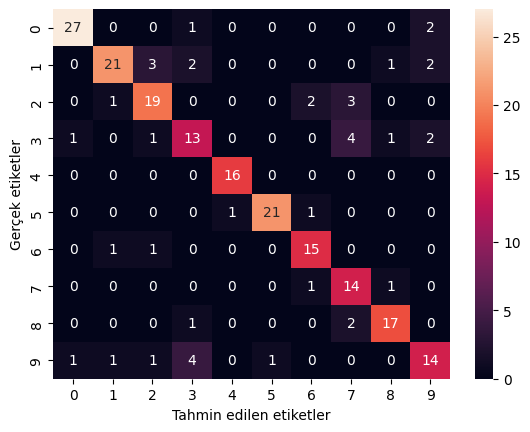

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix oluştur
confusion_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrixini göze hitap eden bir şekilde bastır
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.ylabel("Gerçek etiketler")
plt.xlabel("Tahmin edilen etiketler")
plt.show()
